# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [44]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [45]:
from pprint import pprint

In [46]:
#url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "metric"

# Build partial query URL
#query_url = f"{url}appid={weather_api_key}&units={units}&q="

#query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

# Get weather data
#weather_response = requests.get(query_url)
#weather_json = weather_response.json()

#temperature = weather_json["main"]["temp"]
#print(f"The temperature in Bujumbura is {temperature} C.")


In [56]:
# Set the API base URL

url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID={weather_api_key}"
#units = "metric"

# Build partial query URL
#query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        #['weather']['weather.main']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['name']
        city_date = city_weather['timezone']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | chorozinho
Processing Record 11 of Set 1 | zubtsov
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | hobyo
Processing Record 14 of Set 1 | port glaud
City not found. Skipping...
Processing Record 15 of Set 1 | salmon arm
Processing Record 16 of Set 1 | berdigestyakh
Processing Record 17 of Set 1 | alakurtti
Processing Record 18 of Set 1 | nova sintra
Processing Record 19 of Set 1 | thinadhoo
Processing Record 20 of Set 1 | college
Processing Record 21 of Set 1 | o

Processing Record 38 of Set 4 | nefta
Processing Record 39 of Set 4 | west island
Processing Record 40 of Set 4 | volterra
Processing Record 41 of Set 4 | port elizabeth
Processing Record 42 of Set 4 | aden
Processing Record 43 of Set 4 | pyhajarvi
Processing Record 44 of Set 4 | katsuren-haebaru
Processing Record 45 of Set 4 | malango
Processing Record 46 of Set 4 | safotu
Processing Record 47 of Set 4 | cole harbour
Processing Record 48 of Set 4 | saipan
Processing Record 49 of Set 4 | aroma
Processing Record 0 of Set 5 | burao
Processing Record 1 of Set 5 | alofi
Processing Record 2 of Set 5 | kharp
Processing Record 3 of Set 5 | puerto la cruz
Processing Record 4 of Set 5 | ta`u
Processing Record 5 of Set 5 | alice springs
Processing Record 6 of Set 5 | guajara mirim
Processing Record 7 of Set 5 | kazanskoye
Processing Record 8 of Set 5 | bridgewater
Processing Record 9 of Set 5 | 'ohonua
City not found. Skipping...
Processing Record 10 of Set 5 | boende
Processing Record 11 of Set

Processing Record 27 of Set 8 | igarka
Processing Record 28 of Set 8 | trondheim
Processing Record 29 of Set 8 | cromer
Processing Record 30 of Set 8 | canutama
Processing Record 31 of Set 8 | am djarass
City not found. Skipping...
Processing Record 32 of Set 8 | srivardhan
Processing Record 33 of Set 8 | santa elena de uairen
Processing Record 34 of Set 8 | kimbe
Processing Record 35 of Set 8 | anchorage
Processing Record 36 of Set 8 | bria
Processing Record 37 of Set 8 | mumbwa
Processing Record 38 of Set 8 | la leonesa
Processing Record 39 of Set 8 | yanchep
Processing Record 40 of Set 8 | swakopmund
Processing Record 41 of Set 8 | talcahuano
Processing Record 42 of Set 8 | bubaque
Processing Record 43 of Set 8 | angel r. cabada
Processing Record 44 of Set 8 | miyaly
Processing Record 45 of Set 8 | opuwo
Processing Record 46 of Set 8 | wewak
Processing Record 47 of Set 8 | lilongwe
Processing Record 48 of Set 8 | borogontsy
Processing Record 49 of Set 8 | coquimbo
Processing Record 

Processing Record 19 of Set 12 | andergrove
Processing Record 20 of Set 12 | nassau
Processing Record 21 of Set 12 | portland
Processing Record 22 of Set 12 | truckee
Processing Record 23 of Set 12 | castanos
Processing Record 24 of Set 12 | urangan
Processing Record 25 of Set 12 | yanam
Processing Record 26 of Set 12 | tazacorte
Processing Record 27 of Set 12 | puerto aysen
Processing Record 28 of Set 12 | szekszard
Processing Record 29 of Set 12 | sitka
Processing Record 30 of Set 12 | hata
-----------------------------
Data Retrieval Complete      
-----------------------------


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,9.76,55,36,10.27,Edinburgh of the Seven Seas,0
1,grytviken,-54.2811,-36.5092,2.64,97,100,5.84,Grytviken,-7200
2,waitangi,-43.9535,-176.5597,12.12,86,94,3.13,Waitangi,49500
3,ribeira grande,38.5167,-28.7000,20.22,68,20,4.63,Ribeira Grande,0
4,adamstown,-25.0660,-130.1015,19.85,76,72,11.07,Adamstown,-28800


In [97]:
# Convert the cities weather data into a Pandas DataFrame
# create a DataFrame from cities, lat, and temp

city_data_df = pd.DataFrame(city_data)

latitude = city_data_df["Lat"]
longitude = city_data_df["Lng"]
maxtemp = city_data_df["Max Temp"]
humid = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
windspeed = city_data_df["Wind Speed"]





#city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [63]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,9.76,55,36,10.27,Edinburgh of the Seven Seas,0
1,grytviken,-54.2811,-36.5092,2.64,97,100,5.84,Grytviken,-7200
2,waitangi,-43.9535,-176.5597,12.12,86,94,3.13,Waitangi,49500
3,ribeira grande,38.5167,-28.7000,20.22,68,20,4.63,Ribeira Grande,0
4,adamstown,-25.0660,-130.1015,19.85,76,72,11.07,Adamstown,-28800


In [98]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [99]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,9.76,55,36,10.27,Edinburgh of the Seven Seas,0
1,grytviken,-54.2811,-36.5092,2.64,97,100,5.84,Grytviken,-7200
2,waitangi,-43.9535,-176.5597,12.12,86,94,3.13,Waitangi,49500
3,ribeira grande,38.5167,-28.7000,20.22,68,20,4.63,Ribeira Grande,0
4,adamstown,-25.0660,-130.1015,19.85,76,72,11.07,Adamstown,-28800


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

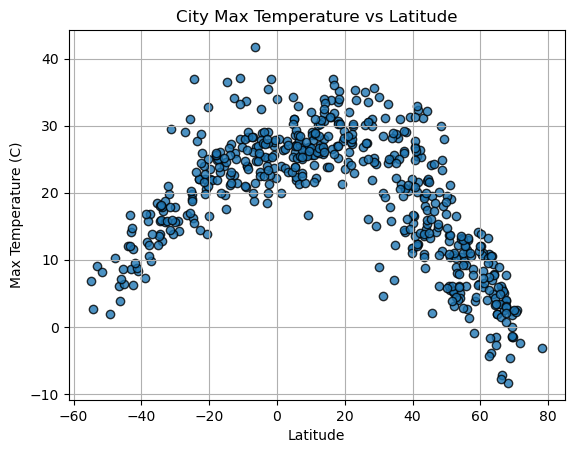

In [101]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values_max_temp = city_data_df["Max Temp"]
plt.scatter(x_values,y_values_max_temp, edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="City")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Temperature vs Latitude")


# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

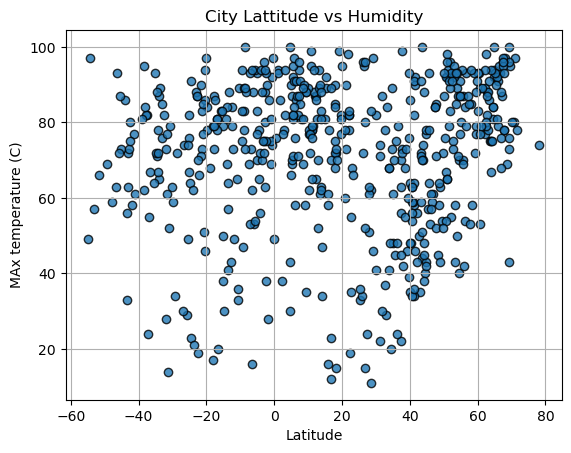

In [102]:
# Build the scatter plots for latitude vs. humidity
y_values_humidity = city_data_df["Humidity"]
plt.scatter(x_values,y_values_humidity, edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="City")
plt.xlabel("Latitude")
plt.ylabel("MAx temperature (C)")
plt.title("City Lattitude vs Humidity")


# Incorporate the other graph properties
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

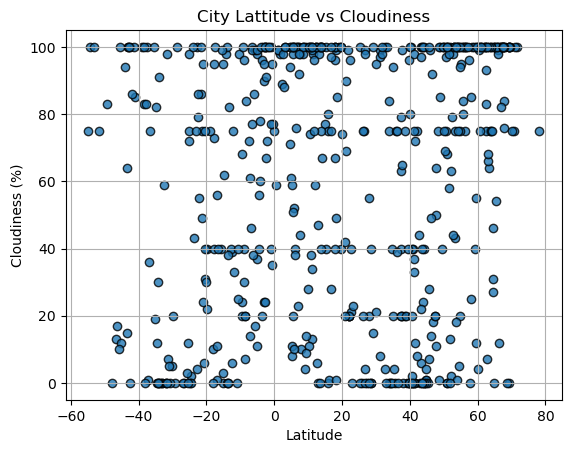

In [103]:
# Build the scatter plots for latitude vs. cloudiness

# Build the scatter plots for latitude vs. humidity

y_values_cloudiness = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values_cloudiness, edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="City")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Lattitude vs Cloudiness")


# Incorporate the other graph properties
plt.grid(True)


# Save the figure

plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

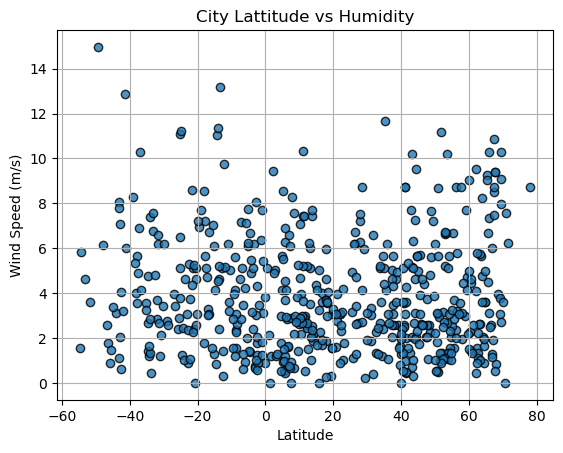

In [104]:
# Build the scatter plots for latitude vs. wind speed
# Build the scatter plots for latitude vs. humidity

y_values_wind_speed = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values_wind_speed, edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="City")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Lattitude vs Humidity")


# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [105]:
from scipy import stats

In [107]:
# Define a function to create Linear Regression plots
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values_max_temp)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)



City_ID
0      25.819271
1      27.866209
2      26.638106
3      16.831186
4      24.392104
         ...    
546    18.006979
547    26.810116
548    15.899680
549    14.626935
550    18.230883
Name: Lat, Length: 551, dtype: float64


In [109]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,ribeira grande,38.5167,-28.7000,20.22,68,20,4.63,Ribeira Grande,0
6,bethel,41.3712,-73.4140,25.50,58,37,0.45,Bethel,-14400
7,tiksi,71.6872,128.8694,-2.39,78,100,6.25,Tiksi,32400
9,zubtsov,56.1753,34.5894,11.42,84,100,2.35,Zubtsov,10800
10,iqaluit,63.7506,-68.5145,4.85,75,75,5.66,Iqaluit,-14400


In [110]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,9.76,55,36,10.27,Edinburgh of the Seven Seas,0
1,grytviken,-54.2811,-36.5092,2.64,97,100,5.84,Grytviken,-7200
2,waitangi,-43.9535,-176.5597,12.12,86,94,3.13,Waitangi,49500
4,adamstown,-25.0660,-130.1015,19.85,76,72,11.07,Adamstown,-28800
5,port-aux-francais,-49.3500,70.2167,1.88,69,83,14.97,Port-aux-Français,18000


###  Temperature vs. Latitude Linear Regression Plot

In [125]:
x_values_north = northern_hemi_df["Lat"]
x_values_south = southern_hemi_df["Lat"]

y_values_north_max_temp = northern_hemi_df["Max Temp"]
y_values_south_max_temp = southern_hemi_df["Max Temp"]

y_values_north_humidity = northern_hemi_df["Humidity"]
y_values_south_humidity = southern_hemi_df["Humidity"]

y_values_north_cloudiness = northern_hemi_df["Cloudiness"]
y_values_south_cloudiness = southern_hemi_df["Cloudiness"]

y_values_north_wind_speed = northern_hemi_df["Wind Speed"]
y_values_south_wind_speed = southern_hemi_df["Wind Speed"]

In [126]:
# Define a function to create Linear Regression plots
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north, y_values_north_max_temp)

# Get regression values
regress_values_north_temp = x_values_north * slope + intercept
print(regress_values_north_temp)

City_ID
3      17.766406
6      16.570787
7       3.872801
9      10.370026
10      7.197080
         ...    
545    26.890476
546    21.907912
548    14.485353
549    10.002356
550    22.696572
Name: Lat, Length: 376, dtype: float64


In [127]:
# Create line equation string
line_eq_north_temp = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.42x +33.9


The r-value is: 0.6688064075675422


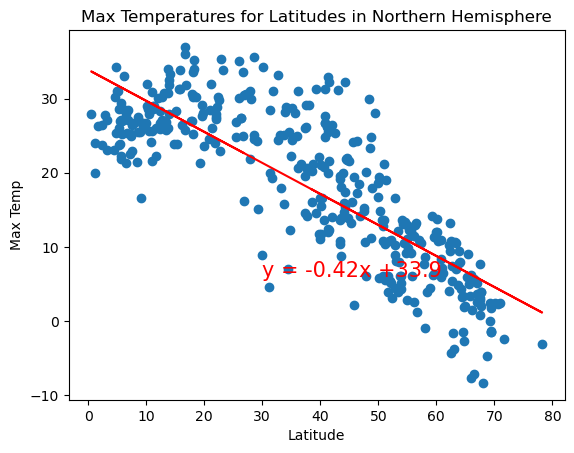

In [133]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north, y_values_north_max_temp)

# Get regression values
regress_values_north_temp = x_values_north * slope + intercept
line_eq_north_temp = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


# Linear Regression Northern Hemisphere
plt.scatter(x_values_north,y_values_north_max_temp)
plt.plot(x_values_north,regress_values_north_temp,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Max Temperatures for Latitudes in Northern Hemisphere")
plt.annotate(line_eq_north_temp,(30,6),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.6243555699213252


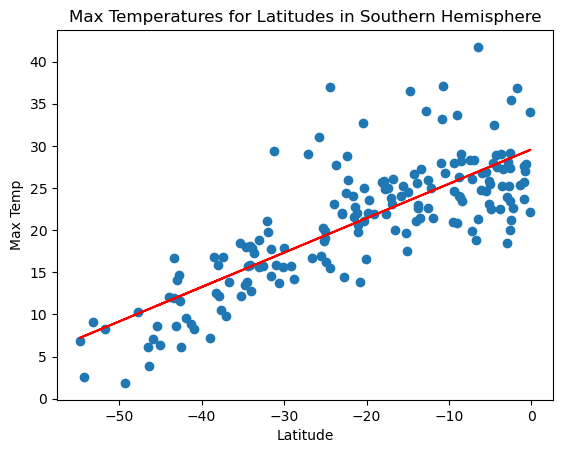

In [128]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south, y_values_south_max_temp)

# Get regression values
regress_values_south_temp = x_values_south * slope + intercept
line_eq_south_temp = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear Regression Northern Hemisphere
plt.scatter(x_values_south,y_values_south_max_temp)
plt.plot(x_values_south,regress_values_south_temp,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Max Temperatures for Latitudes in Southern Hemisphere")
plt.annotate(line_eq_south_temp,(30,6),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a trend of higher maximum temperatures, the closer the latitude is to 0, to the equator. Therefore there is a negative linear relationship in the northern hemisphere, and positive linear relationship in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.012461027400883166


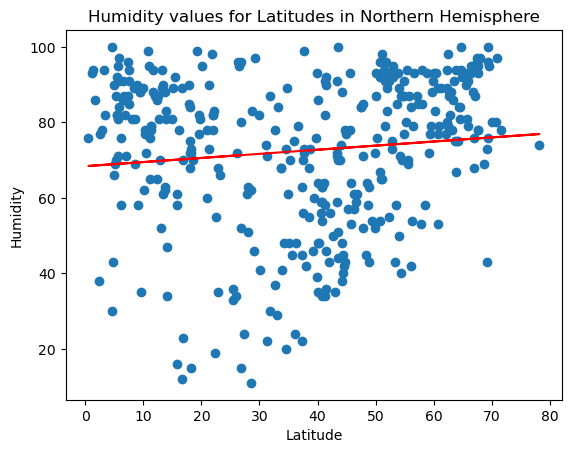

In [136]:
# Northern Hemisphere
 # Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north, y_values_north_humidity)

# Get regression values
regress_values_north_humidity = x_values_north * slope + intercept
line_eq_north_humidity = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))



# Linear Regression Northern Hemisphere
plt.scatter(x_values_north,y_values_north_humidity)
plt.plot(x_values_north,regress_values_north_humidity,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity values for Latitudes in Northern Hemisphere")
plt.annotate(line_eq_north_humidity,(30,6),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.009393192854572636


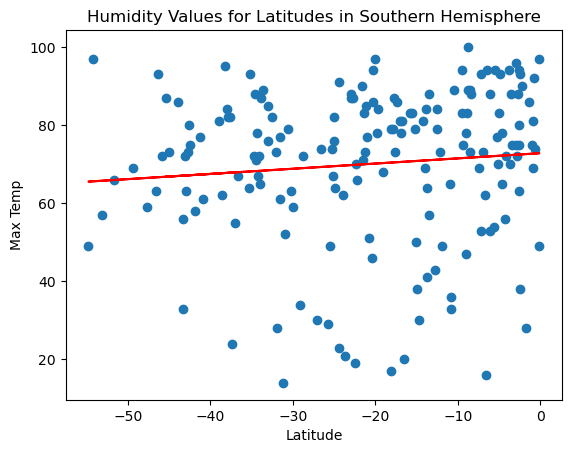

In [139]:
# Southern Hemisphere
 # Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south, y_values_south_humidity)

# Get regression values
regress_values_south_humidity = x_values_south * slope + intercept
line_eq_south_humidity = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Linear Regression Northern Hemisphere
plt.scatter(x_values_south,y_values_south_humidity)
plt.plot(x_values_south,regress_values_south_humidity,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Humidity Values for Latitudes in Southern Hemisphere")
plt.annotate(line_eq_south_humidity,(30,6),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a not a strong correlation between humidity values and latitude for both the northern and souther hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0038620972471432903


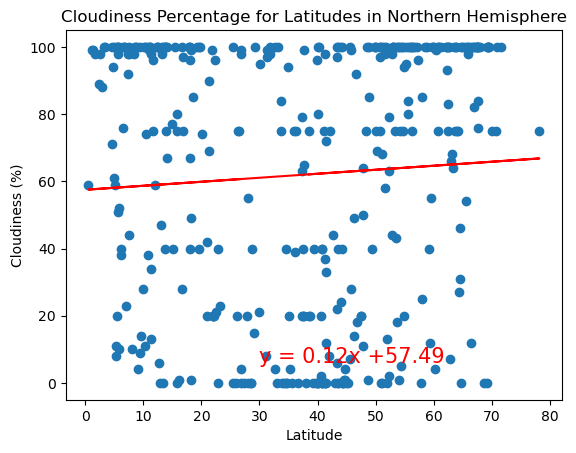

In [140]:
# Northern Hemisphere
 # Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north, y_values_north_cloudiness)

# Get regression values
regress_values_north_cloudiness = x_values_north * slope + intercept
line_eq_north_cloudiness = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


# Linear Regression Northern Hemisphere
plt.scatter(x_values_north,y_values_north_cloudiness)
plt.plot(x_values_north,regress_values_north_cloudiness,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness Percentage for Latitudes in Northern Hemisphere")
plt.annotate(line_eq_north_cloudiness,(30,6),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.014955231774647576


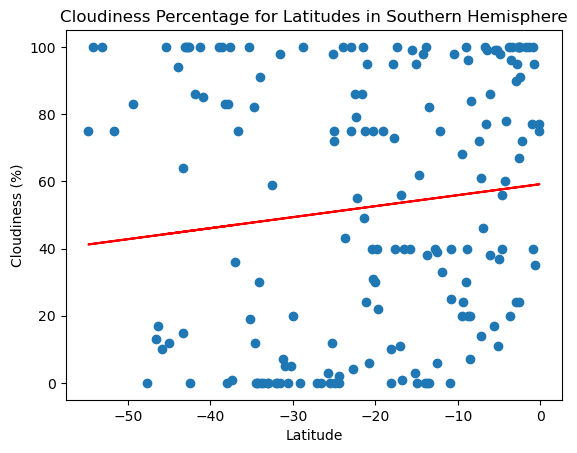

In [142]:
# Southern Hemisphere
 # Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south, y_values_south_cloudiness)

# Get regression values
regress_values_south_cloudiness = x_values_south * slope + intercept
line_eq_south_cloudiness = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear Regression Northern Hemisphere
plt.scatter(x_values_south,y_values_south_cloudiness)
plt.plot(x_values_south,regress_values_south_cloudiness,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness Percentage for Latitudes in Southern Hemisphere")
plt.annotate(line_eq_south_cloudiness,(30,6),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a not a strong correlation between cloudiness values and latitude for both the northern and souther hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.018963367624111032


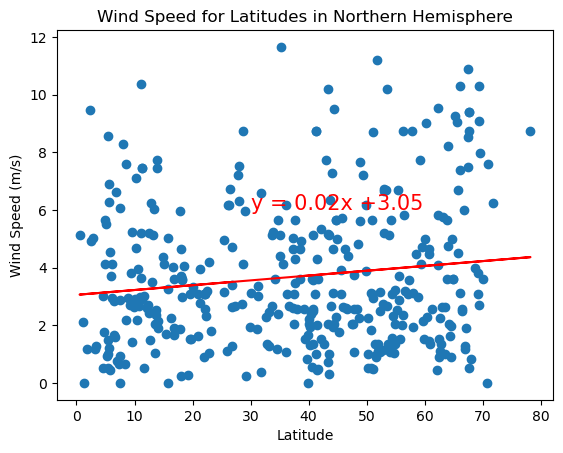

In [143]:
# Northern Hemisphere
 # Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north, y_values_north_wind_speed)

# Get regression values
regress_values_north_wind_speed = x_values_north * slope + intercept
line_eq_north_wind_speed = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear Regression Northern Hemisphere
plt.scatter(x_values_north,y_values_north_wind_speed)
plt.plot(x_values_north,regress_values_north_wind_speed,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed for Latitudes in Northern Hemisphere")
plt.annotate(line_eq_north_wind_speed,(30,6),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.013006648865520576


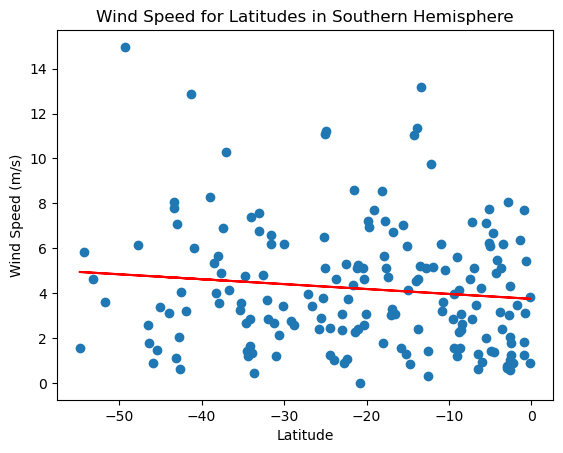

In [144]:
# Southern Hemisphere
 # Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south, y_values_south_wind_speed)

# Get regression values
regress_values_south_wind_speed = x_values_south * slope + intercept
line_eq_south_wind_speed = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear Regression Northern Hemisphere
plt.scatter(x_values_south,y_values_south_wind_speed)
plt.plot(x_values_south,regress_values_south_wind_speed,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed for Latitudes in Southern Hemisphere")
plt.annotate(line_eq_south_wind_speed,(30,6),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a not a strong correlation between wind speed values and latitude for both the northern and souther hemisphere.